# Problem Statment<a href="#Problem-Statment" class="anchor-link">¶</a>

Goal It is your job to predict the sales price for each house. For each
Id in the test set, you must predict the value of the SalePrice
variable.

Metric Submissions are evaluated on Mean-Squared-Error (MSE). Submission
File Format The file should contain a header and have the following
format:

    Id,SalePrice
    1461,169000.1
    1462,187724.1233
    1463,175221

You can see an example submission file (sample_submission.csv)

# Read dataset<a href="#Read-dataset" class="anchor-link">¶</a>

In \[1\]:

    import pandas as pd
    from warnings import filterwarnings
    filterwarnings("ignore")

    trd = pd.read_csv("Desktop/Projects/Housing/training_set.csv")
    trd.head(2)

Out\[1\]:

|     | Id  | MSSubClass | MSZoning | LotFrontage | LotArea | Street | Alley | LotShape | LandContour | Utilities | ... | PoolArea | PoolQC | Fence | MiscFeature | MiscVal | MoSold | YrSold | SaleType | SaleCondition | SalePrice |
|-----|-----|------------|----------|-------------|---------|--------|-------|----------|-------------|-----------|-----|----------|--------|-------|-------------|---------|--------|--------|----------|---------------|-----------|
| 0   | 1   | 60         | RL       | 65.0        | 8450    | Pave   | NaN   | Reg      | Lvl         | AllPub    | ... | 0        | NaN    | NaN   | NaN         | 0       | 2      | 2008   | WD       | Normal        | 208500    |
| 1   | 2   | 20         | RL       | 80.0        | 9600    | Pave   | NaN   | Reg      | Lvl         | AllPub    | ... | 0        | NaN    | NaN   | NaN         | 0       | 5      | 2007   | WD       | Normal        | 181500    |

2 rows × 81 columns

In \[2\]:

    tsd = pd.read_csv("Desktop/Projects/Housing/testing_set.csv")
    tsd.head(2)

Out\[2\]:

|     | Id   | MSSubClass | MSZoning | LotFrontage | LotArea | Street | Alley | LotShape | LandContour | Utilities | ... | ScreenPorch | PoolArea | PoolQC | Fence | MiscFeature | MiscVal | MoSold | YrSold | SaleType | SaleCondition |
|-----|------|------------|----------|-------------|---------|--------|-------|----------|-------------|-----------|-----|-------------|----------|--------|-------|-------------|---------|--------|--------|----------|---------------|
| 0   | 1461 | 20         | RH       | 80.0        | 11622   | Pave   | NaN   | Reg      | Lvl         | AllPub    | ... | 120         | 0        | NaN    | MnPrv | NaN         | 0       | 6      | 2010   | WD       | Normal        |
| 1   | 1462 | 20         | RL       | 81.0        | 14267   | Pave   | NaN   | IR1      | Lvl         | AllPub    | ... | 0           | 0        | NaN    | NaN   | Gar2        | 12500   | 6      | 2010   | WD       | Normal        |

2 rows × 80 columns

# Profile<a href="#Profile" class="anchor-link">¶</a>

In \[3\]:

    trd.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1460 entries, 0 to 1459
    Data columns (total 81 columns):
    Id               1460 non-null int64
    MSSubClass       1460 non-null int64
    MSZoning         1460 non-null object
    LotFrontage      1201 non-null float64
    LotArea          1460 non-null int64
    Street           1460 non-null object
    Alley            91 non-null object
    LotShape         1460 non-null object
    LandContour      1460 non-null object
    Utilities        1460 non-null object
    LotConfig        1460 non-null object
    LandSlope        1460 non-null object
    Neighborhood     1460 non-null object
    Condition1       1460 non-null object
    Condition2       1460 non-null object
    BldgType         1460 non-null object
    HouseStyle       1460 non-null object
    OverallQual      1460 non-null int64
    OverallCond      1460 non-null int64
    YearBuilt        1460 non-null int64
    YearRemodAdd     1460 non-null int64
    RoofStyle        1460 non-null object
    RoofMatl         1460 non-null object
    Exterior1st      1460 non-null object
    Exterior2nd      1460 non-null object
    MasVnrType       1452 non-null object
    MasVnrArea       1452 non-null float64
    ExterQual        1460 non-null object
    ExterCond        1460 non-null object
    Foundation       1460 non-null object
    BsmtQual         1423 non-null object
    BsmtCond         1423 non-null object
    BsmtExposure     1422 non-null object
    BsmtFinType1     1423 non-null object
    BsmtFinSF1       1460 non-null int64
    BsmtFinType2     1422 non-null object
    BsmtFinSF2       1460 non-null int64
    BsmtUnfSF        1460 non-null int64
    TotalBsmtSF      1460 non-null int64
    Heating          1460 non-null object
    HeatingQC        1460 non-null object
    CentralAir       1460 non-null object
    Electrical       1459 non-null object
    1stFlrSF         1460 non-null int64
    2ndFlrSF         1460 non-null int64
    LowQualFinSF     1460 non-null int64
    GrLivArea        1460 non-null int64
    BsmtFullBath     1460 non-null int64
    BsmtHalfBath     1460 non-null int64
    FullBath         1460 non-null int64
    HalfBath         1460 non-null int64
    BedroomAbvGr     1460 non-null int64
    KitchenAbvGr     1460 non-null int64
    KitchenQual      1460 non-null object
    TotRmsAbvGrd     1460 non-null int64
    Functional       1460 non-null object
    Fireplaces       1460 non-null int64
    FireplaceQu      770 non-null object
    GarageType       1379 non-null object
    GarageYrBlt      1379 non-null float64
    GarageFinish     1379 non-null object
    GarageCars       1460 non-null int64
    GarageArea       1460 non-null int64
    GarageQual       1379 non-null object
    GarageCond       1379 non-null object
    PavedDrive       1460 non-null object
    WoodDeckSF       1460 non-null int64
    OpenPorchSF      1460 non-null int64
    EnclosedPorch    1460 non-null int64
    3SsnPorch        1460 non-null int64
    ScreenPorch      1460 non-null int64
    PoolArea         1460 non-null int64
    PoolQC           7 non-null object
    Fence            281 non-null object
    MiscFeature      54 non-null object
    MiscVal          1460 non-null int64
    MoSold           1460 non-null int64
    YrSold           1460 non-null int64
    SaleType         1460 non-null object
    SaleCondition    1460 non-null object
    SalePrice        1460 non-null int64
    dtypes: float64(3), int64(35), object(43)
    memory usage: 924.0+ KB

In \[4\]:

    tsd.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1459 entries, 0 to 1458
    Data columns (total 80 columns):
    Id               1459 non-null int64
    MSSubClass       1459 non-null int64
    MSZoning         1455 non-null object
    LotFrontage      1232 non-null float64
    LotArea          1459 non-null int64
    Street           1459 non-null object
    Alley            107 non-null object
    LotShape         1459 non-null object
    LandContour      1459 non-null object
    Utilities        1457 non-null object
    LotConfig        1459 non-null object
    LandSlope        1459 non-null object
    Neighborhood     1459 non-null object
    Condition1       1459 non-null object
    Condition2       1459 non-null object
    BldgType         1459 non-null object
    HouseStyle       1459 non-null object
    OverallQual      1459 non-null int64
    OverallCond      1459 non-null int64
    YearBuilt        1459 non-null int64
    YearRemodAdd     1459 non-null int64
    RoofStyle        1459 non-null object
    RoofMatl         1459 non-null object
    Exterior1st      1458 non-null object
    Exterior2nd      1458 non-null object
    MasVnrType       1443 non-null object
    MasVnrArea       1444 non-null float64
    ExterQual        1459 non-null object
    ExterCond        1459 non-null object
    Foundation       1459 non-null object
    BsmtQual         1415 non-null object
    BsmtCond         1414 non-null object
    BsmtExposure     1415 non-null object
    BsmtFinType1     1417 non-null object
    BsmtFinSF1       1458 non-null float64
    BsmtFinType2     1417 non-null object
    BsmtFinSF2       1458 non-null float64
    BsmtUnfSF        1458 non-null float64
    TotalBsmtSF      1458 non-null float64
    Heating          1459 non-null object
    HeatingQC        1459 non-null object
    CentralAir       1459 non-null object
    Electrical       1459 non-null object
    1stFlrSF         1459 non-null int64
    2ndFlrSF         1459 non-null int64
    LowQualFinSF     1459 non-null int64
    GrLivArea        1459 non-null int64
    BsmtFullBath     1457 non-null float64
    BsmtHalfBath     1457 non-null float64
    FullBath         1459 non-null int64
    HalfBath         1459 non-null int64
    BedroomAbvGr     1459 non-null int64
    KitchenAbvGr     1459 non-null int64
    KitchenQual      1458 non-null object
    TotRmsAbvGrd     1459 non-null int64
    Functional       1457 non-null object
    Fireplaces       1459 non-null int64
    FireplaceQu      729 non-null object
    GarageType       1383 non-null object
    GarageYrBlt      1381 non-null float64
    GarageFinish     1381 non-null object
    GarageCars       1458 non-null float64
    GarageArea       1458 non-null float64
    GarageQual       1381 non-null object
    GarageCond       1381 non-null object
    PavedDrive       1459 non-null object
    WoodDeckSF       1459 non-null int64
    OpenPorchSF      1459 non-null int64
    EnclosedPorch    1459 non-null int64
    3SsnPorch        1459 non-null int64
    ScreenPorch      1459 non-null int64
    PoolArea         1459 non-null int64
    PoolQC           3 non-null object
    Fence            290 non-null object
    MiscFeature      51 non-null object
    MiscVal          1459 non-null int64
    MoSold           1459 non-null int64
    YrSold           1459 non-null int64
    SaleType         1458 non-null object
    SaleCondition    1459 non-null object
    dtypes: float64(11), int64(26), object(43)
    memory usage: 912.0+ KB

# Missing Data treatment<a href="#Missing-Data-treatment" class="anchor-link">¶</a>

In \[5\]:

    trd.Alley = trd.Alley.fillna("None")
    trd.BsmtQual = trd.BsmtQual.fillna("None")
    trd.BsmtCond = trd.BsmtCond.fillna("None")
    trd.BsmtExposure = trd.BsmtExposure.fillna("None")
    trd.BsmtFinType1 = trd.BsmtFinType1.fillna("None")
    trd.BsmtFinType2 = trd.BsmtFinType2.fillna("None")
    trd.FireplaceQu = trd.FireplaceQu.fillna("None")
    trd.GarageType = trd.GarageType.fillna("None")
    trd.GarageFinish = trd.GarageFinish.fillna("None")
    trd.GarageQual = trd.GarageQual.fillna("None")
    trd.GarageCond = trd.GarageCond.fillna("None")
    trd.PoolQC = trd.PoolQC.fillna("None")
    trd.Fence = trd.Fence.fillna("None")
    trd.MiscFeature = trd.MiscFeature.fillna("None")

In \[6\]:

    tsd.Alley = tsd.Alley.fillna("None")
    tsd.BsmtQual = tsd.BsmtQual.fillna("None")
    tsd.BsmtCond = tsd.BsmtCond.fillna("None")
    tsd.BsmtExposure = tsd.BsmtExposure.fillna("None")
    tsd.BsmtFinType1 = tsd.BsmtFinType1.fillna("None")
    tsd.BsmtFinType2 = tsd.BsmtFinType2.fillna("None")
    tsd.FireplaceQu = tsd.FireplaceQu.fillna("None")
    tsd.GarageType = tsd.GarageType.fillna("None")
    tsd.GarageFinish = tsd.GarageFinish.fillna("None")
    tsd.GarageQual = tsd.GarageQual.fillna("None")
    tsd.GarageCond = tsd.GarageCond.fillna("None")
    tsd.PoolQC = tsd.PoolQC.fillna("None")
    tsd.Fence = tsd.Fence.fillna("None")
    tsd.MiscFeature = tsd.MiscFeature.fillna("None")

In \[7\]:

    trd.isna().sum()

Out\[7\]:

    Id                 0
    MSSubClass         0
    MSZoning           0
    LotFrontage      259
    LotArea            0
    Street             0
    Alley              0
    LotShape           0
    LandContour        0
    Utilities          0
    LotConfig          0
    LandSlope          0
    Neighborhood       0
    Condition1         0
    Condition2         0
    BldgType           0
    HouseStyle         0
    OverallQual        0
    OverallCond        0
    YearBuilt          0
    YearRemodAdd       0
    RoofStyle          0
    RoofMatl           0
    Exterior1st        0
    Exterior2nd        0
    MasVnrType         8
    MasVnrArea         8
    ExterQual          0
    ExterCond          0
    Foundation         0
                    ... 
    BedroomAbvGr       0
    KitchenAbvGr       0
    KitchenQual        0
    TotRmsAbvGrd       0
    Functional         0
    Fireplaces         0
    FireplaceQu        0
    GarageType         0
    GarageYrBlt       81
    GarageFinish       0
    GarageCars         0
    GarageArea         0
    GarageQual         0
    GarageCond         0
    PavedDrive         0
    WoodDeckSF         0
    OpenPorchSF        0
    EnclosedPorch      0
    3SsnPorch          0
    ScreenPorch        0
    PoolArea           0
    PoolQC             0
    Fence              0
    MiscFeature        0
    MiscVal            0
    MoSold             0
    YrSold             0
    SaleType           0
    SaleCondition      0
    SalePrice          0
    Length: 81, dtype: int64

In \[8\]:

    tsd.isna().sum()

Out\[8\]:

    Id                 0
    MSSubClass         0
    MSZoning           4
    LotFrontage      227
    LotArea            0
    Street             0
    Alley              0
    LotShape           0
    LandContour        0
    Utilities          2
    LotConfig          0
    LandSlope          0
    Neighborhood       0
    Condition1         0
    Condition2         0
    BldgType           0
    HouseStyle         0
    OverallQual        0
    OverallCond        0
    YearBuilt          0
    YearRemodAdd       0
    RoofStyle          0
    RoofMatl           0
    Exterior1st        1
    Exterior2nd        1
    MasVnrType        16
    MasVnrArea        15
    ExterQual          0
    ExterCond          0
    Foundation         0
                    ... 
    HalfBath           0
    BedroomAbvGr       0
    KitchenAbvGr       0
    KitchenQual        1
    TotRmsAbvGrd       0
    Functional         2
    Fireplaces         0
    FireplaceQu        0
    GarageType         0
    GarageYrBlt       78
    GarageFinish       0
    GarageCars         1
    GarageArea         1
    GarageQual         0
    GarageCond         0
    PavedDrive         0
    WoodDeckSF         0
    OpenPorchSF        0
    EnclosedPorch      0
    3SsnPorch          0
    ScreenPorch        0
    PoolArea           0
    PoolQC             0
    Fence              0
    MiscFeature        0
    MiscVal            0
    MoSold             0
    YrSold             0
    SaleType           1
    SaleCondition      0
    Length: 80, dtype: int64

In \[9\]:

    con = []
    cat = []
    for i in trd.columns:
        if(trd[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)

In \[10\]:

    cat

Out\[10\]:

    ['MSZoning',
     'Street',
     'Alley',
     'LotShape',
     'LandContour',
     'Utilities',
     'LotConfig',
     'LandSlope',
     'Neighborhood',
     'Condition1',
     'Condition2',
     'BldgType',
     'HouseStyle',
     'RoofStyle',
     'RoofMatl',
     'Exterior1st',
     'Exterior2nd',
     'MasVnrType',
     'ExterQual',
     'ExterCond',
     'Foundation',
     'BsmtQual',
     'BsmtCond',
     'BsmtExposure',
     'BsmtFinType1',
     'BsmtFinType2',
     'Heating',
     'HeatingQC',
     'CentralAir',
     'Electrical',
     'KitchenQual',
     'Functional',
     'FireplaceQu',
     'GarageType',
     'GarageFinish',
     'GarageQual',
     'GarageCond',
     'PavedDrive',
     'PoolQC',
     'Fence',
     'MiscFeature',
     'SaleType',
     'SaleCondition']

In \[11\]:

    con.remove("SalePrice")

In \[12\]:

    Q = list(trd[con].nunique().sort_values().index[0:15])

In \[13\]:

    for i in Q:
        cat.append(i)
        con.remove(i)

In \[14\]:

    for i in cat:
        x = trd[i].mode()[0]
        trd[i] = trd[i].fillna(x)
        tsd[i] = tsd[i].fillna(x)
        
    for i in con:
        x = trd[i].mean()
        trd[i] = trd[i].fillna(x)
        tsd[i] = tsd[i].fillna(x)

In \[15\]:

    trd.isna().sum()

Out\[15\]:

    Id               0
    MSSubClass       0
    MSZoning         0
    LotFrontage      0
    LotArea          0
    Street           0
    Alley            0
    LotShape         0
    LandContour      0
    Utilities        0
    LotConfig        0
    LandSlope        0
    Neighborhood     0
    Condition1       0
    Condition2       0
    BldgType         0
    HouseStyle       0
    OverallQual      0
    OverallCond      0
    YearBuilt        0
    YearRemodAdd     0
    RoofStyle        0
    RoofMatl         0
    Exterior1st      0
    Exterior2nd      0
    MasVnrType       0
    MasVnrArea       0
    ExterQual        0
    ExterCond        0
    Foundation       0
                    ..
    BedroomAbvGr     0
    KitchenAbvGr     0
    KitchenQual      0
    TotRmsAbvGrd     0
    Functional       0
    Fireplaces       0
    FireplaceQu      0
    GarageType       0
    GarageYrBlt      0
    GarageFinish     0
    GarageCars       0
    GarageArea       0
    GarageQual       0
    GarageCond       0
    PavedDrive       0
    WoodDeckSF       0
    OpenPorchSF      0
    EnclosedPorch    0
    3SsnPorch        0
    ScreenPorch      0
    PoolArea         0
    PoolQC           0
    Fence            0
    MiscFeature      0
    MiscVal          0
    MoSold           0
    YrSold           0
    SaleType         0
    SaleCondition    0
    SalePrice        0
    Length: 81, dtype: int64

In \[16\]:

    tsd.isna().sum()

Out\[16\]:

    Id               0
    MSSubClass       0
    MSZoning         0
    LotFrontage      0
    LotArea          0
    Street           0
    Alley            0
    LotShape         0
    LandContour      0
    Utilities        0
    LotConfig        0
    LandSlope        0
    Neighborhood     0
    Condition1       0
    Condition2       0
    BldgType         0
    HouseStyle       0
    OverallQual      0
    OverallCond      0
    YearBuilt        0
    YearRemodAdd     0
    RoofStyle        0
    RoofMatl         0
    Exterior1st      0
    Exterior2nd      0
    MasVnrType       0
    MasVnrArea       0
    ExterQual        0
    ExterCond        0
    Foundation       0
                    ..
    HalfBath         0
    BedroomAbvGr     0
    KitchenAbvGr     0
    KitchenQual      0
    TotRmsAbvGrd     0
    Functional       0
    Fireplaces       0
    FireplaceQu      0
    GarageType       0
    GarageYrBlt      0
    GarageFinish     0
    GarageCars       0
    GarageArea       0
    GarageQual       0
    GarageCond       0
    PavedDrive       0
    WoodDeckSF       0
    OpenPorchSF      0
    EnclosedPorch    0
    3SsnPorch        0
    ScreenPorch      0
    PoolArea         0
    PoolQC           0
    Fence            0
    MiscFeature      0
    MiscVal          0
    MoSold           0
    YrSold           0
    SaleType         0
    SaleCondition    0
    Length: 80, dtype: int64

# Outliers<a href="#Outliers" class="anchor-link">¶</a>

In \[17\]:

    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)

In \[18\]:

    out = []
    for i in con:
        out = out + list(X1[(X1[i]>3)|(X1[i]<-3)].index)

In \[19\]:

    from numpy import unique
    outliers = list(unique(out))

In \[20\]:

    trd = trd.drop(index=outliers,axis=0)

In \[21\]:

    trd.shape

Out\[21\]:

    (1167, 81)

In \[22\]:

    trd.index = range(0,1167,1)

In \[23\]:

    #trd

# EDA<a href="#EDA" class="anchor-link">¶</a>

In \[24\]:

    Q = pd.DataFrame(trd.corr()['SalePrice'].sort_values())
    imp_cons = list(Q[(Q.SalePrice>0.1)|(Q.SalePrice<-0.1)][Q.SalePrice!=1].index)

In \[25\]:

    len(cat)

Out\[25\]:

    58

In \[26\]:

    73/4

Out\[26\]:

    18.25

    import matplotlib.pyplot as plt
    import seaborn as sb

    plt.figure(figsize=(10,40))
    x = 0
    for i in cat:
        x = x + 1
        plt.subplot(19,4,x)
        sb.boxplot(trd[i],trd.SalePrice)

# Data Preparation<a href="#Data-Preparation" class="anchor-link">¶</a>

In \[27\]:

    trd[con].head()

Out\[27\]:

|     | Id  | LotFrontage | LotArea | YearBuilt | YearRemodAdd | MasVnrArea | BsmtFinSF1 | BsmtFinSF2 | BsmtUnfSF | TotalBsmtSF | ... | LowQualFinSF | GrLivArea | GarageYrBlt | GarageArea | WoodDeckSF | OpenPorchSF | EnclosedPorch | 3SsnPorch | ScreenPorch | MiscVal |
|-----|-----|-------------|---------|-----------|--------------|------------|------------|------------|-----------|-------------|-----|--------------|-----------|-------------|------------|------------|-------------|---------------|-----------|-------------|---------|
| 0   | 1   | 65.0        | 8450    | 2003      | 2003         | 196.0      | 706        | 0          | 150       | 856         | ... | 0            | 1710      | 2003.0      | 548        | 0          | 61          | 0             | 0         | 0           | 0       |
| 1   | 2   | 80.0        | 9600    | 1976      | 1976         | 0.0        | 978        | 0          | 284       | 1262        | ... | 0            | 1262      | 1976.0      | 460        | 298        | 0           | 0             | 0         | 0           | 0       |
| 2   | 3   | 68.0        | 11250   | 2001      | 2002         | 162.0      | 486        | 0          | 434       | 920         | ... | 0            | 1786      | 2001.0      | 608        | 0          | 42          | 0             | 0         | 0           | 0       |
| 3   | 5   | 84.0        | 14260   | 2000      | 2000         | 350.0      | 655        | 0          | 490       | 1145        | ... | 0            | 2198      | 2000.0      | 836        | 192        | 84          | 0             | 0         | 0           | 0       |
| 4   | 7   | 75.0        | 10084   | 2004      | 2005         | 186.0      | 1369       | 0          | 317       | 1686        | ... | 0            | 1694      | 2004.0      | 636        | 255        | 57          | 0             | 0         | 0           | 0       |

5 rows × 22 columns

In \[28\]:

    trd[cat].head()

Out\[28\]:

|     | MSZoning | Street | Alley | LotShape | LandContour | Utilities | LotConfig | LandSlope | Neighborhood | Condition1 | ... | BsmtFullBath | GarageCars | YrSold | BedroomAbvGr | PoolArea | OverallCond | OverallQual | TotRmsAbvGrd | MoSold | MSSubClass |
|-----|----------|--------|-------|----------|-------------|-----------|-----------|-----------|--------------|------------|-----|--------------|------------|--------|--------------|----------|-------------|-------------|--------------|--------|------------|
| 0   | RL       | Pave   | None  | Reg      | Lvl         | AllPub    | Inside    | Gtl       | CollgCr      | Norm       | ... | 1            | 2          | 2008   | 3            | 0        | 5           | 7           | 8            | 2      | 60         |
| 1   | RL       | Pave   | None  | Reg      | Lvl         | AllPub    | FR2       | Gtl       | Veenker      | Feedr      | ... | 0            | 2          | 2007   | 3            | 0        | 8           | 6           | 6            | 5      | 20         |
| 2   | RL       | Pave   | None  | IR1      | Lvl         | AllPub    | Inside    | Gtl       | CollgCr      | Norm       | ... | 1            | 2          | 2008   | 3            | 0        | 5           | 7           | 6            | 9      | 60         |
| 3   | RL       | Pave   | None  | IR1      | Lvl         | AllPub    | FR2       | Gtl       | NoRidge      | Norm       | ... | 1            | 3          | 2008   | 4            | 0        | 5           | 8           | 9            | 12     | 60         |
| 4   | RL       | Pave   | None  | Reg      | Lvl         | AllPub    | Inside    | Gtl       | Somerst      | Norm       | ... | 1            | 2          | 2007   | 3            | 0        | 5           | 8           | 7            | 8      | 20         |

5 rows × 58 columns

In \[29\]:

    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X1 = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)
    X2 = pd.get_dummies(trd[cat])
    Xnew = X1.join(X2)

    X11 = pd.DataFrame(ss.transform(tsd[con]),columns=con)
    X21 = pd.get_dummies(tsd[cat])
    Xnew_test = X11.join(X21)

In \[30\]:

    len(X2.columns),len(X21.columns)

Out\[30\]:

    (265, 263)

In \[31\]:

    Xnew_test[Xnew.columns]

    ---------------------------------------------------------------------------
    KeyError                                  Traceback (most recent call last)
    <ipython-input-31-86d64ada70b6> in <module>
    ----> 1 Xnew_test[Xnew.columns]

    ~/Library/Python/3.7/lib/python/site-packages/pandas/core/frame.py in __getitem__(self, key)
       2932                 key = list(key)
       2933             indexer = self.loc._convert_to_indexer(key, axis=1,
    -> 2934                                                    raise_missing=True)
       2935 
       2936         # take() does not accept boolean indexers

    ~/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py in _convert_to_indexer(self, obj, axis, is_setter, raise_missing)
       1352                 kwargs = {'raise_missing': True if is_setter else
       1353                           raise_missing}
    -> 1354                 return self._get_listlike_indexer(obj, axis, **kwargs)[1]
       1355         else:
       1356             try:

    ~/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py in _get_listlike_indexer(self, key, axis, raise_missing)
       1159         self._validate_read_indexer(keyarr, indexer,
       1160                                     o._get_axis_number(axis),
    -> 1161                                     raise_missing=raise_missing)
       1162         return keyarr, indexer
       1163 

    ~/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py in _validate_read_indexer(self, key, indexer, axis, raise_missing)
       1250             if not(self.name == 'loc' and not raise_missing):
       1251                 not_found = list(set(key) - set(ax))
    -> 1252                 raise KeyError("{} not in index".format(not_found))
       1253 
       1254             # we skip the warning on Categorical/Interval

    KeyError: "['RoofMatl_Roll', 'Condition2_RRAn', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Heating_Floor', 'Condition2_RRNn', 'GarageQual_Ex', 'PoolQC_Fa', 'Exterior2nd_Other'] not in index"

In \[32\]:

    Q = ['RoofMatl_Roll', 'Condition2_RRAn', 'Electrical_Mix', 'Exterior1st_ImStucc', 'Heating_Floor', 'Condition2_RRNn', 'GarageQual_Ex', 'PoolQC_Fa', 'Exterior2nd_Other']

In \[33\]:

    for i in Q:
        Xnew_test[i]=0

In \[34\]:

    #Xnew_test[Xnew.columns]

# Splitting<a href="#Splitting" class="anchor-link">¶</a>

In \[35\]:

    Y = trd[["SalePrice"]]
    from sklearn.model_selection import train_test_split

    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Regression Models<a href="#Regression-Models" class="anchor-link">¶</a>

In \[36\]:

    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    model = lm.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    tr_err,ts_err

Out\[36\]:

    (214420225.8, 5.171784323487073e+23)

# Backward Elemination OLS models<a href="#Backward-Elemination-OLS-models" class="anchor-link">¶</a>

In \[37\]:

    from statsmodels.api import add_constant,OLS
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst).fit()

In \[38\]:

    #ols.summary()

In \[39\]:

    rsq = round(ols.rsquared_adj,4)

In \[40\]:

    col_to_drop = ols.pvalues.sort_values().index[-1]

In \[41\]:

    RS = []
    for i in range(0,169,1):
        Xnew = Xnew.drop(labels=col_to_drop,axis=1)
        xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
        from statsmodels.api import add_constant,OLS
        xconst = add_constant(xtrain)
        ols = OLS(ytrain,xconst).fit()
        rsq = round(ols.rsquared_adj,4)
        RS.append(rsq)
        col_to_drop = ols.pvalues.sort_values().index[-1]
        if(col_to_drop=="const"):
            col_to_drop = ols.pvalues.sort_values().index[-2]
        else:
            col_to_drop = ols.pvalues.sort_values().index[-1]

In \[43\]:

    import matplotlib.pyplot as plt
    plt.plot(RS)

Out\[43\]:

    [<matplotlib.lines.Line2D at 0x1275be8d0>]

![](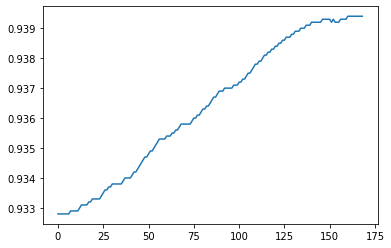%0A)

In \[45\]:

    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    model = lm.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    tr_err,ts_err

Out\[45\]:

    (226128723.18, 521072192.29)

In \[48\]:

    def modeller(mo):
        model = mo.fit(xtrain,ytrain)
        tr_pred = model.predict(xtrain)
        ts_pred = model.predict(xtest)
        from sklearn.metrics import mean_squared_error
        tr_err = round(mean_squared_error(ytrain,tr_pred),2)
        ts_err = round(mean_squared_error(ytest,ts_pred),2)
        return tr_err,ts_err

In \[49\]:

    modeller(lm)

Out\[49\]:

    (226128723.18, 521072192.29)

# Regularize<a href="#Regularize" class="anchor-link">¶</a>

In \[46\]:

    from sklearn.linear_model import Ridge,Lasso

In \[50\]:

    rr = Ridge(alpha=1)
    modeller(rr)

Out\[50\]:

    (235804347.45, 488489982.89)

In \[55\]:

    q = 0.0
    alphas = []
    for i in range(0,500):
        q = round(q + 0.1,2)
        alphas.append(q)

In \[56\]:

    tr = []
    ts = []
    for i in alphas:
        rr = Ridge(alpha=i)
        tr_err,ts_err = modeller(rr)
        tr.append(tr_err)
        ts.append(ts_err)

In \[57\]:

    plt.plot(tr)
    plt.plot(ts)

Out\[57\]:

    [<matplotlib.lines.Line2D at 0x1280c9668>]

![](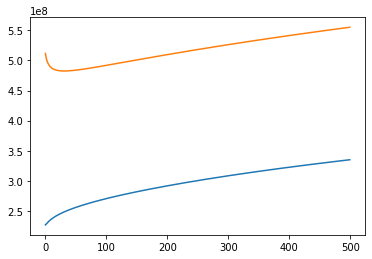%0A)

In \[62\]:

    q = 0.0
    alphas = []
    for i in range(0,700):
        q = round(q + 0.1,2)
        alphas.append(q)

    tr = []
    ts = []
    for i in alphas:
        ls = Lasso(alpha=i)
        tr_err,ts_err = modeller(ls)
        tr.append(tr_err)
        ts.append(ts_err)
    plt.plot(tr)
    plt.plot(ts)

Out\[62\]:

    [<matplotlib.lines.Line2D at 0x117e49a90>]

![](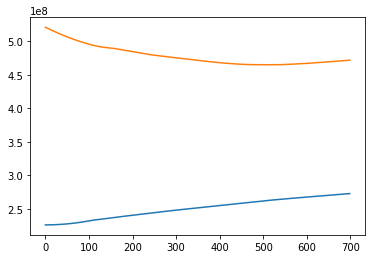%0A)

In \[63\]:

    521072192.29 - 226128723.18

Out\[63\]:

    294943469.11

In \[64\]:

    alphas[500]

Out\[64\]:

    50.1

In \[66\]:

    ls = Lasso(alpha=50.1)
    modeller(ls)

Out\[66\]:

    (261836353.1, 464790723.03)

In \[67\]:

    464790723.03 - 261836353.1

Out\[67\]:

    202954369.92999998

In \[68\]:

    294943469 - 202954369

Out\[68\]:

    91989100

In \[70\]:

    from sklearn.model_selection import GridSearchCV
    ls = Lasso()
    tg = {"alpha":alphas}

    cv = GridSearchCV(ls,tg,scoring="neg_mean_squared_error",cv=5)
    cvmodel = cv.fit(Xnew,Y)
    cvmodel.best_params_

Out\[70\]:

    {'alpha': 10.0}

# Final Model<a href="#Final-Model" class="anchor-link">¶</a>

In \[71\]:

    ls = Lasso(alpha=10.0)
    model = ls.fit(Xnew,Y)

# Data preparation for predictions<a href="#Data-preparation-for-predictions" class="anchor-link">¶</a>

In \[74\]:

    final_df_pred = Xnew_test[Xnew.columns]

In \[79\]:

    pred = model.predict(final_df_pred)

In \[80\]:

    Q = tsd[["Id"]]
    Q['SalePrice']=pred

In \[82\]:

    Q.to_csv("Desktop/submissions.csv")